In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
#Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
#Shape of the arrays
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('x_test shape',x_test.shape)
print('y_test shape',y_test.shape)

x_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
x_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [6]:
#Take a look at first image
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

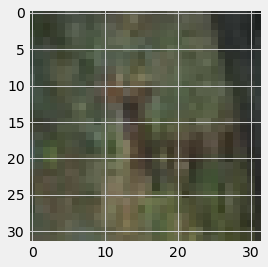

In [7]:
#show the image as a picture
img = plt.imshow(x_train[index])

In [8]:
#Get the oimage lable
print('The Image lable is ', y_train[index])

The Image lable is  [4]


In [9]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Print the image class
print('The image class is:', classification[y_train[index][0]])



The image class is: deer


In [10]:
#Convert th elables to set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [11]:
#print the new lable of the image picture above
print('The one hot lable is:', y_train_one_hot[index])

The one hot lable is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [12]:
#Normalise the pixels to the values between 0,1
x_train = x_train / 255
x_test = x_test / 255


In [13]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [14]:
#create models architecture
model = Sequential()

#add first layer that will be convolution layer to extract features from the input image
#and then it will create 32 5*5 ray to covulated features or feature to map
model.add(Conv2D(32, (5,5),activation = 'relu', input_shape = (32,32,3)))

#adding a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Adding a second convolutional layer
model.add(Conv2D(32, (5,5),activation = 'relu'))

#adding another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Adding a flattening layer
model.add(Flatten())

#Adding a layer with 1000 neurons
model.add(Dense(1000, activation = 'relu'))

#add a dropout layer
model.add(Dropout(0.5))

#Adding a layer with 500 neurons
model.add(Dense(500, activation = 'relu'))

#add a dropout layer
model.add(Dropout(0.5))

#Another layer of 250 Neurons
model.add(Dense(250, activation = 'relu'))

#Another layer of 10 Neurons
model.add(Dense(10, activation = 'softmax'))

In [15]:
#Compile the Modle
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])


In [16]:
#Train the model
hist = model.fit(x_train, y_train_one_hot,
                batch_size= 256,
                epochs= 10,
                validation_split= 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 60s 1ms/step - loss: 1.8126 - accuracy: 0.3166 - val_loss: 1.5287 - val_accuracy: 0.4302
Epoch 2/10
40000/40000 [==============================] - 59s 1ms/step - loss: 1.4445 - accuracy: 0.4698 - val_loss: 1.3381 - val_accuracy: 0.5201
Epoch 3/10
40000/40000 [==============================] - 59s 1ms/step - loss: 1.2821 - accuracy: 0.5380 - val_loss: 1.2058 - val_accuracy: 0.5742
Epoch 4/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.1831 - accuracy: 0.5795 - val_loss: 1.1457 - val_accuracy: 0.5945
Epoch 5/10
40000/40000 [==============================] - 59s 1ms/step - loss: 1.1037 - accuracy: 0.6099 - val_loss: 1.1199 - val_accuracy: 0.5994
Epoch 6/10
40000/40000 [==============================] - 58s 1ms/step - loss: 1.0291 - accuracy: 0.6352 - val_loss: 1.0287 - val_accuracy: 0.6373
Epoch 7/10
40000/40000 [==============================] - 58s 1ms/st

In [17]:
#Evaluate the model using the test dataset
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 505us/step


0.6819999814033508

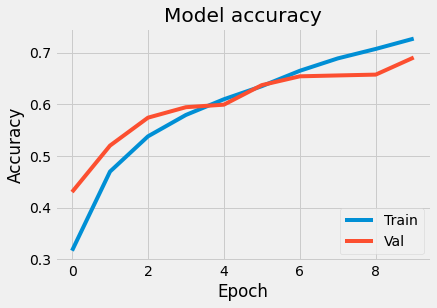

In [18]:
#Visualize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'lower right')
plt.show()

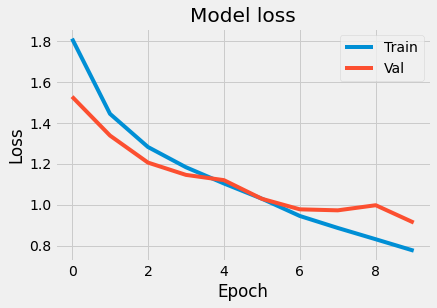

In [19]:
#Visualize the Model loss
#Visualize the model accuracy
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc = 'upper right')
plt.show()

In [45]:
#Testing the model with an example
from google.colab import files
uploaded = files.upload()

Saving plane1.jpg to plane1.jpg


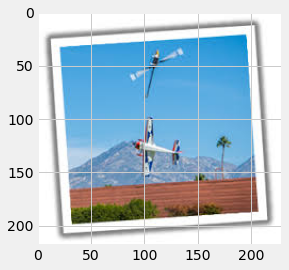

In [46]:
#Show the image
new_image = plt.imread('plane1.jpg')
img = plt.imshow(new_image)

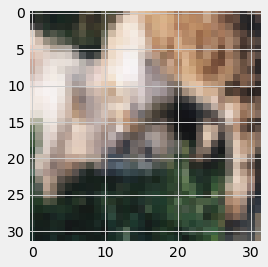

In [47]:
#Resize the img
from skimage.transform import resize
resize_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [48]:
#Get the models predictions
predict = model.predict(np.array([resize_image]))
#Show the prediction
predict

array([[1.24619575e-02, 7.05995798e-01, 2.94553558e-03, 1.26561406e-03,
        9.27640940e-04, 5.92205499e-04, 6.24387816e-04, 7.69398292e-04,
        3.30662169e-02, 2.41351202e-01]], dtype=float32)

In [49]:
#Sort the predicted from least to greatest 
list_index = [0,1,2,3,4,5,6,7,8,9]
x= predict

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
        temp = list_index[i]
        list_index[i] = list_index[j]
        list_index[j] = temp

#Show the sorted lables in order
print(list_index)

[1, 9, 8, 0, 2, 3, 4, 7, 6, 5]


In [50]:
#Print the first five predictions
for i in range(5):
  print(classification[list_index[i]],':' , round(predict[0][list_index[i]]*100,2), '%')

automobile : 70.6 %
truck : 24.14 %
ship : 3.31 %
airplane : 1.25 %
bird : 0.29 %
